In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Cargo el dataset

dataset = pd.read_csv('pima-indians-diabetes.csv', encoding = "ISO-8859-1", delimiter=',', header=0,
                     names= ['pregnant','glucose','pressure','triceps','insulin','mass',
                            'pedigree','age','diabetes'])  

dataset


,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [2]:
#Tomamos las variable edad y glucosa en plasma para clasificar diabetes

#Importamos las librerias

from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as sm

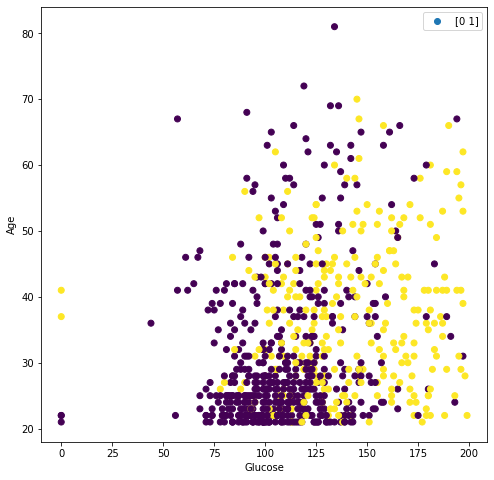

In [3]:
#Graficamos las variables independientes

legend = dataset['diabetes'].unique()

plt.figure(figsize=(8,8))
plt.scatter(dataset['glucose'], dataset['age'], c= dataset['diabetes'],label= legend)
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.legend()
plt.show()

In [4]:
#Dividimos el dataset en train, test

X_train,X_test,y_train, y_test = train_test_split(
dataset[['glucose','age']],dataset['diabetes'], random_state=123, test_size= 0.2
)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

     glucose  age
217       85   32
294      151   28
639      102   27
303      150   37
573      143   23
..       ...  ...
98       122   31
322      152   43
382       90   25
365      124   29
510      139   21

[613 rows x 2 columns]
     glucose  age
182       73   27
318      194   59
622       94   21
720      114   21
444      180   25
..       ...  ...
119      162   25
178      130   37
310      106   22
171       87   25
577      133   36

[154 rows x 2 columns]
217    1
294    0
639    0
303    0
573    0
      ..
98     1
322    1
382    0
365    1
510    0
Name: diabetes, Length: 613, dtype: int64
182    0
318    1
622    0
720    0
444    1
      ..
119    1
178    1
310    0
171    0
577    0
Name: diabetes, Length: 154, dtype: int64


## Clasificación Modelo Logistico

In [5]:
#Instanciamos el modelo logistico y lo entrenamos

clasificador = linear_model.LogisticRegression()

#Entrenamos el modelo

clasificador.fit(X_train, y_train)

LogisticRegression()

In [6]:
#Predecimos los valores

pred = clasificador.predict(X_test)


<Figure size 576x576 with 0 Axes>

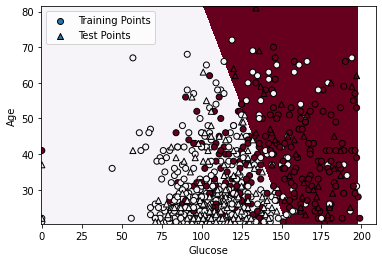

In [7]:
#Graficamos los valores de test y los predichos

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

X = np.array(X_test)


x_min, x_max = X[:, 0].min() - 0.5,  X[:, 0].max() + 0.5
y_min, y_max =  X[:, 1].min() - 0.5,  X[:, 1].max() + 0.5

h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clasificador.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = "PuRd", shading ='auto')

# # Plot also the training points
plt.scatter(X_train['glucose'],X_train['age'], c=y_train, edgecolors="k", cmap="PuRd",label='Training Points')
# Plot also the testing points
plt.scatter(X_test['glucose'],X_test['age'], c=pred, edgecolors="k", cmap="PuRd",marker="^",label='Test Points')
plt.legend(loc="upper left")
plt.xlabel("Glucose")
plt.ylabel("Age")
plt.show()


In [8]:
#Obtenemos las métricas de error del modelo
#Traemos accuracy y roc scored
from sklearn.metrics import roc_auc_score

accuracy = clasificador.score(X_test,y_test)
roc= roc_auc_score(y_test, pred)

print("El accuracy del modelo es =", round(accuracy, 2)) 
print("El área bajo la curva =", round(roc, 2))


El accuracy del modelo es = 0.77
El área bajo la curva = 0.71


In [12]:
#Optimizamos el error mediante cross_validation

from sklearn.model_selection import KFold

X= np.array(X_train)

# Instancio el iterador
kf = KFold(n_splits=5, random_state=None, shuffle=False)

#Armo una lista para guardar las metricas

accuracy = []
roc = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    x_train, x_test = dataset.loc[train_index,['glucose','age']], dataset.loc[test_index,['glucose','age']]
    y_train, y_test = dataset.loc[train_index,['diabetes']], dataset.loc[test_index,['diabetes']]
    clasificador.fit(x_train, y_train)
    accuracy.append(clasificador.score(x_test, y_test))
    roc.append(roc_auc_score(y_test,clasificador.predict(x_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [13]:
accuracy_mean = sum(accuracy)/len(accuracy)
print("El accuracy promedio es: ", round(accuracy_mean,2))

roc_mean =sum(roc)/len(roc)
print("El area bajo la curva promedio es: ", round(roc_mean,2))

El accuracy promedio es:  0.73
El area bajo la curva promedio es:  0.67


## Modelo Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

#Instanciamos el modelo
tree = DecisionTreeClassifier(max_depth=3)

#Dividimos el dataset

X_train,X_test,y_train, y_test = train_test_split(
dataset[['glucose','age']],dataset['diabetes'], random_state=123, test_size= 0.2)

#Entrenamos el árbol de decision

tree.fit(X_train,y_train)

#Generamos las predicciones

tree.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
      dtype=int64)

In [15]:
#Obtenemos las metricas de error por Kfolds


X= np.array(X_train)

# Instancio el iterador
kf = KFold(n_splits=5, random_state=None, shuffle=False)

#Armo una lista para guardar las metricas

accuracy = []
roc = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    x_train, x_test = dataset.loc[train_index,['glucose','age']], dataset.loc[test_index,['glucose','age']]
    y_train, y_test = dataset.loc[train_index,['diabetes']], dataset.loc[test_index,['diabetes']]
    tree.fit(x_train, y_train)
    accuracy.append(clasificador.score(x_test, y_test))
    roc.append(roc_auc_score(y_test,tree.predict(x_test)))


In [16]:
accuracy_mean = sum(accuracy)/len(accuracy)
print("El accuracy promedio es: ", round(accuracy_mean,2))

roc_mean =sum(roc)/len(roc)
print("El area bajo la curva promedio es: ", round(roc_mean,2))

El accuracy promedio es:  0.73
El area bajo la curva promedio es:  0.65


In [18]:
# Hiperoptimizacion del max_depth

param_grid = { 
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [19]:
from sklearn.model_selection import GridSearchCV #grid search

#Modelo

arbol = DecisionTreeClassifier()

CV_dt = GridSearchCV(estimator=arbol, param_grid=param_grid, cv= 5)


CV_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8]})

In [20]:
#Buscamos el mejor estimador

CV_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
#Vemos los errores

resultados = pd.DataFrame(CV_dt.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False)

,param_criterion,param_max_depth,mean_test_score,std_test_score
5,entropy,4,0.714863,0.023298
6,entropy,5,0.704618,0.038622
8,entropy,7,0.682272,0.033223
0,gini,4,0.674170,0.065612
7,entropy,6,0.668068,0.043676
1,gini,5,0.668027,0.067843
3,gini,7,0.663987,0.057122
9,entropy,8,0.661905,0.038996
2,gini,6,0.659926,0.058692
4,gini,8,0.643620,0.056005


In [22]:
#Hacemos la estimacion con los parametros que dieron mejor performance

model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

model.fit(x_train,y_train)

model.predict(x_test)


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [23]:
#Obtenemos las metricas de performance una vez optimizado

accuracy_opt = (model.score(x_test, y_test))
roc_opt = roc_auc_score(y_test,model.predict(x_test))

print("Una vez optimizado el modelo tiene un accuracy de:",round(accuracy_opt,2))
print("Una vez optimizado el modelo el area bajo la curva es:",round(roc_opt,2))

Una vez optimizado el modelo tiene un accuracy de: 0.83
Una vez optimizado el modelo el area bajo la curva es: 0.7
